In [1]:
2+3

5

# This is a markdown cell

Can include math? inline: $\sum_0^\infty a_n$, display: $$\sum_0^\infty a_n$$

## mermaid

```mermaid
sequenceDiagram
   Foo->>Bar: msg
```

```mermaid
graph LR
    A(aaa) --> B([bbb])
```

### images of mermaid
Based on https://gist.github.com/MLKrisJohnson/2d2df47879ee6afd3be9d6788241fe99 and official https://mermaid.js.org/ecosystem/tutorials.html#jupyter-python-integration-with-mermaid-js

remote from mermaid.ink:

![remote png](https://mermaid.ink/svg/CmdyYXBoIExSCiAgICBBKGFhYSkgLS0+IEIoW2JiYl0pIAo=?type=png)

![remote svg](https://mermaid.ink/svg/CmdyYXBoIExSCiAgICBBKGFhYSkgLS0+IEIoW2JiYl0pIAo=)

local files (saved from above urls):

![local png](mermaid.png)

![local svg](mermaid.svg)

In [4]:
# Via python, remote
import base64from IPython.display import Image, SVG
graph = b"""
graph LR    A(aaa) --> B([bbb]) """
g64 = base64.urlsafe_b64encode(graph).decode("ascii")
svg = f"https://mermaid.ink/svg/{g64}"
png = f"https://mermaid.ink/img/{g64}?type=png"
Image(url=svg)

In [3]:
Image(url=png)

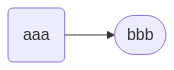

In [24]:
# Via python, embedded as data: url

# Gets 403, only when loaded from Python, dunno why
#Image(url=png, format='png', embed=True)
data = open('mermaid.png', 'rb').read()
Image(data=data, format='png', embed=True)

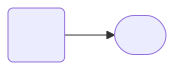

In [6]:
data = open('mermaid.svg', 'rb').read()
#Image(data=data, format='svg', embed=True)  # => Cannot embed the 'svg' image format
SVG(data=data)
# Resulting mimebundle in the .ipynb:
#   "image/svg+xml": [
#     "<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" id=\"mermaid-svg\" ...
#   ],
#   "text/plain": [
#     "<IPython.core.display.SVG object>"
#   ]
# which GitHub/GitLab/NBViewer all render as inline <svg> in the HTML!  That is unsecure, so they censor&break it to varying degrees :-(
# https://gitlab.com/cben/sandbox/blob/2a0fdd7f78abdabd16d9430c81d059b7ce915639/jupyter_notebook/mermaid_mime_type.ipynb
# https://github.com/cben/sandbox/blob/2a0fdd7f78abdabd16d9430c81d059b7ce915639/jupyter_notebook/mermaid_mime_type.ipynb
# https://nbviewer.org/github/cben/sandbox/blob/2a0fdd7f78abdabd16d9430c81d059b7ce915639/jupyter_notebook/mermaid_mime_type.ipynb

In [7]:
# Let's do what Image refuses to embed — <img> tag with data URL containing svg.  This I hope SHOULD render safely in GitHub/GitLab/NBViewer??
Image(url='data:image/svg+xml;base64,' + base64.b64encode(data).decode('latin1'))